텍스트 전처리
1. 특수문자 처리
    + 단위특수문자 -> 영어 
    + 일반적 의미의 특수문자 -> 한글
    + 숫자특수문자 -> 숫자

In [1]:
import numpy as np
import pandas as pd
import os
import re
import hanja
import tqdm
import multiprocessing
import parmap
import json
import datetime
import matplotlib.pyplot as plt
import preprocessing.prepro as pp



# 1. 외부 데이터 전처리

### 1-1.네이버 뉴스 데이터
출처: https://wikidocs.net/74913

In [ ]:
df = pd.DataFrame(columns=['file_name', 'title','topic_idx']).reset_index()

root = "./additional_data/newsData"

for path in os.listdir(root):
    for file in os.listdir(os.path.join(root,path)):
        with open(os.path.join(root, path, file), encoding='utf-8') as f:
            content = f.read()
            title = str(re.findall("^.+\t",content)[0]).rstrip('\t')
            title = re.sub("\[.+]","",title)
            df = df.append(pd.DataFrame(data=[[file, title, path]], columns=['file_name','title', 'topic_idx']))
            

df.to_csv("./additional_data/naverNews.csv")

### 1-2. 모두의 말뭉치
출처: https://rlkujwkk7.toastcdn.net/14/NIKL_NEWSPAPER_2020_v1.0.pdf

In [13]:
topic_dic = {
    'IT/과학':0,
    '경제':1,
    '사회':2,
    '생활':3,
    '문화':3,
    '스포츠':5,
    '정치':6
}

In [11]:
lst_dics = []
path ='./additional_data/신문_말뭉치_1/' 
for jfile in os.listdir(path):
    with open(path+jfile, mode='r', errors='ignore', encoding='utf-8') as json_file:
        lst_dics.append(json.load(json_file))

In [12]:
len(lst_dics)

35

In [23]:
data = pd.DataFrame(columns=['index','title','topic_idx'])

for js in range(len(lst_dics)):
    for i in lst_dics[js]['document']:
        topic = i['metadata']['topic']
        
        if topic in ['연예','미용/건강']:
            continue
        
        title= i['paragraph'][0]['form'].strip('"')
#         if i['metadata']['topic'] in ['스포츠']:
#             sports = sports.append(pd.DataFrame(data=[[None, title, 5]], columns=['index', 'title','topic_idx']))
#         else:    
#             data = data.append(pd.DataFrame(data=[[None, title]], columns=['index', 'title']))

        data = data.append(pd.DataFrame(data=[[None, title, topic_dic[topic]]], columns=['index', 'title', 'topic_idx']))
    dt_now = datetime.datetime.now()
    print("{:>2} is done. {}".format(js, dt_now))


 0 is done. 2021-07-26 12:32:23.637380
 1 is done. 2021-07-26 12:32:48.385958
 2 is done. 2021-07-26 12:33:07.136274
 3 is done. 2021-07-26 12:33:21.730980
 4 is done. 2021-07-26 12:34:48.690672
 5 is done. 2021-07-26 12:35:31.564981
 6 is done. 2021-07-26 12:35:52.091072
 7 is done. 2021-07-26 12:39:03.585305
 8 is done. 2021-07-26 12:39:36.352501
 9 is done. 2021-07-26 12:40:57.094355
10 is done. 2021-07-26 12:42:48.912658
11 is done. 2021-07-26 12:43:57.906103
12 is done. 2021-07-26 12:45:44.057133
13 is done. 2021-07-26 12:47:27.921524
14 is done. 2021-07-26 12:48:18.844753
15 is done. 2021-07-26 12:53:04.810627
16 is done. 2021-07-26 12:54:10.417806
17 is done. 2021-07-26 12:56:12.460899
18 is done. 2021-07-26 12:59:09.400349
19 is done. 2021-07-26 13:03:57.632592
20 is done. 2021-07-26 13:06:03.338642
21 is done. 2021-07-26 13:07:18.980546
22 is done. 2021-07-26 13:10:12.356434
23 is done. 2021-07-26 13:14:19.467884
24 is done. 2021-07-26 13:17:23.597637
25 is done. 2021-07-26 13

In [2]:
data.to_csv('./additional_data/everyones_corpus_2019+.csv')

NameError: name 'data' is not defined

In [11]:
everyones = pd.read_csv('./additional_data/everyones_corpus_2019+.csv')

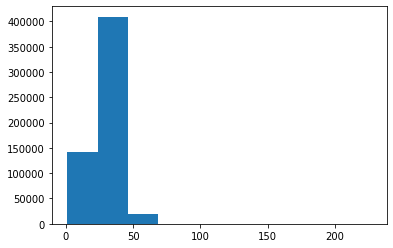

In [20]:
length = []
for i in list(np.array(everyones['title'].tolist())):
    length.append(len(i))
plt.hist(length)
plt.show()

In [22]:
drop_idx = []
content = list(everyones.title.values)
for i in range(len(content)):
    if len(content[i]) < 15 or len(content[i]) >36:
        drop_idx.append(i)    

In [23]:
len(drop_idx)

106726

In [26]:
everyones = everyones.drop(drop_idx)

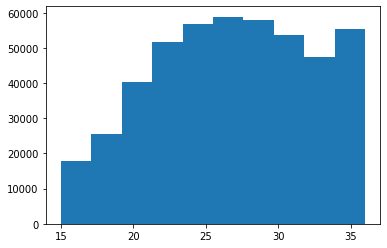

In [27]:
length = []
for i in list(np.array(everyones['title'].tolist())):
    length.append(len(i))
plt.hist(length)
plt.show()

In [30]:
replaced_data = pp.replaceChar(everyones)

100%|███████████████████████████████████████████████████████████████████████| 465149/465149 [1:00:58<00:00, 127.15it/s]


In [31]:
replaced_data.to_csv('./additional_data/everyones_corpus_2019+.csv')

In [ ]:
dataLength = []
for i in sorted(list(np.array(replaced_data['title'].tolist())), key=len, reverse=True):
    dataLength.append(len(i))


In [ ]:
max()ataLength

# 문자열 치환

In [48]:
train_data = pd.read_csv('./data/klue-ynat-test.csv')

In [49]:
replaced_data = pp.replaceChar(train_data)

100%|█████████████████████████████████████████████████████████████████████████████| 9107/9107 [00:12<00:00, 751.48it/s]


In [50]:
replaced_data.to_csv('./data/new_klue-ynat-test.csv')

# 숫자 제거

In [76]:
data = pd.read_csv('./data/new_klue-ynat-test.csv')

In [77]:
for i in range(len(data.title.values)):
    data.title[i] = re.sub("[^가-힣a-zA-Z\ ]", "", data.title[i])

<ipython-input-77-19f04603abbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.title[i] = re.sub("[^가-힣a-zA-Z\ ]", "", data.title[i])


In [79]:
data.to_csv('./data/ynat_test_data_prepro_num_char.csv')

# 띄어쓰기 교정

In [8]:
data = pd.read_csv('./data/test_data.rep.csv')

In [9]:
sents = data.title.values

data['title'] = pp.spellcheck(sents)

100%|██████████████████████████████████████████████████████████████████████████████| 9131/9131 [03:35<00:00, 42.37it/s]


In [10]:
data.to_csv('./data/test_data.rep.spac.csv')

## 데이터셋 병합

In [1]:
import preprocessing.prepro as pp
import pandas as pd

In [34]:
path1 = './additional_data/everyones_corpus_2019+.csv'
path2 = './data/new_train_data.csv'

In [35]:
new_data = pp.mergeData(path1, path2, isTopic=True)

In [42]:
new_data=new_data.drop_duplicates(['title'])

In [44]:
#저장 
new_data.index = new_data['index']
new_data.drop(columns=['index']).to_csv("./data/everyone_naver_train.csv")

# 2. KLUE TESTset 전처리 (평가용도)

In [ ]:
path = './additional_data/KLUE-ynat/ynat-v1_dev.json'
klue_ynat = []
with open(path, mode='r', errors='ignore', encoding='utf-8') as json_file:
    klue_ynat.append(json.load(json_file))

In [ ]:
topic_dic = {
    'IT과학':0,
    '경제':1,
    '사회':2,
    '생활문화':3,
    '세계':4,
    '스포츠':5,
    '정치':6
}

In [ ]:
data = pd.DataFrame(columns=['title','topic_idx'])
content = klue_ynat[0]

for num in tqdm.tqdm(range(len(content))):
    topic = content[num]['predefined_news_category']
    title= content[num]['title']

    data = data.append(pd.DataFrame(data=[[title, topic_dic[topic]]], columns=['title', 'topic_idx']))

# ==========================